<a href="https://colab.research.google.com/github/Krishnaa548/Machine_learning/blob/main/linear_regression_for_predictive_modeling_in_healthcare_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Import Libraries and Load Data

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
# Here we use a public URL for the insurance dataset.
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

# Rename the 'charges' column to 'expenses'
df.rename(columns={'charges': 'expenses'}, inplace=True)

# Display the first few rows
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# @title expenses

from matplotlib import pyplot as plt
df['expenses'].plot(kind='hist', bins=20, title='expenses')
plt.gca().spines[['top', 'right',]].set_visible(False)

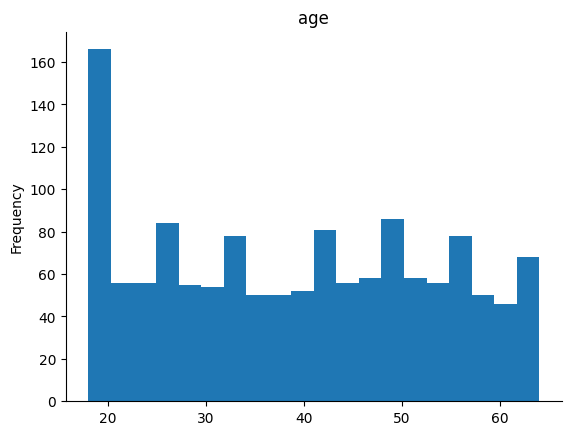

In [2]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
# Cell 2: Preprocess Data
# Convert categorical columns into numeric via one-hot encoding.
# This automatically converts categorical data into numbers.

df_processed = pd.get_dummies(df, drop_first=True)

# Split the data into features and labels.
X = df_processed.drop('expenses', axis=1)
y = df_processed['expenses']

# Split into train (80%) and test (20%) datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1070, 8)
Test set shape: (268, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


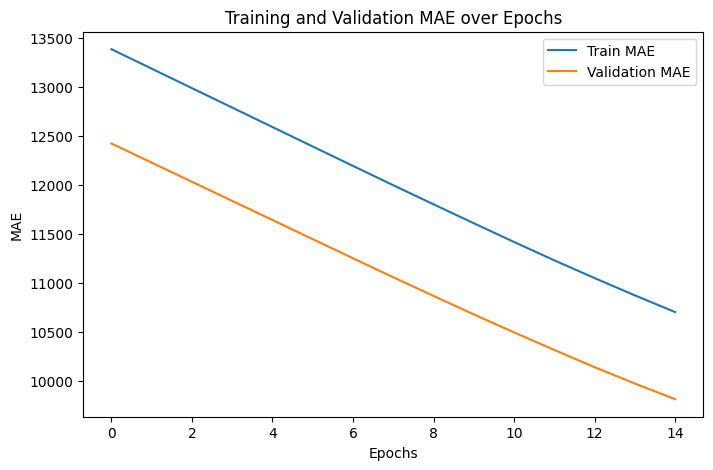

In [6]:
# Cell 3: Build and Train the Linear Regression Model
# Create a simple model with one Dense unit for linear regression.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[X_train.shape[1]])
])

# Compile the model with the Adam optimizer and Mean Absolute Error (MAE) as loss.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae'])

# Train the model. Adjust epochs if needed to achieve MAE under 3500.
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, verbose=0)

# Plot the training history if you want to see the loss curve.
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.title("Training and Validation MAE over Epochs")
plt.show()


Test MAE: $10109.70
MAE is above 3500. Consider tuning hyperparameters or training for more epochs.
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


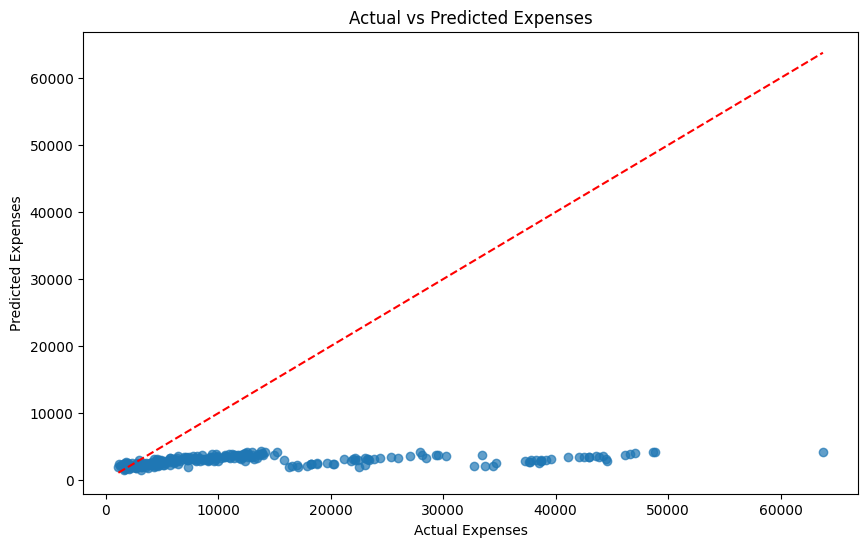

In [7]:
# Cell 4: Evaluate the Model and Visualize Predictions

# Evaluate on the unseen test dataset.
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print("Test MAE: ${:.2f}".format(test_mae))

# Check if test MAE is under 3500
if test_mae < 3500:
    print("Challenge passed! The model predicts healthcare costs within $3500 accuracy.")
else:
    print("MAE is above 3500. Consider tuning hyperparameters or training for more epochs.")

# Predict expenses using the test dataset.
y_pred = model.predict(X_test).flatten()

# Plot actual vs predicted expenses.
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Actual vs Predicted Expenses")
# Plot a reference line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
